In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

['Monochromator Step - Photons', 'Photons (cps) - Photons', 'Monochromator Step - Plot 1', 'Photons (cps) - Plot 1']
4200 5983


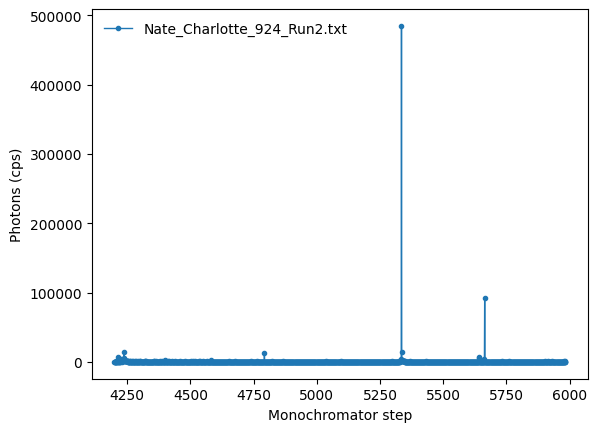

In [ ]:
paths = [
         "/Users/charlottemyers/projects/jlab/spectro/data/Nate_Charlotte_924_Run2.txt",
        #"/Users/charlottemyers/projects/jlab/spectro/data/Nate_Charlotte_929_cal.txt"
        ]

plt.figure()
for path in paths:
  df = pd.read_csv(path, sep="\t")
  print(df.columns.tolist())
  df = df.iloc[:, [0, 1]].rename(columns={df.columns[0]: "step", df.columns[1]: "cps"})

  step = df["step"].to_numpy()
  print(np.min(step), np.max(step))
  cps  = df["cps"].to_numpy()
  ## normalize cps
  #cps = cps / np.max(cps)

  plt.plot(step, cps, lw=1, label = path.split("/")[-1])
  plt.xlabel("Monochromator step")
  plt.ylabel("Photons (cps)")



lines = [4046.563, 4358.328, 5460.735,
         5769.60, 5790.66,  # yellow doublet
          6149.475]
        # nm

# for line in lines:
#     plt.axvline(line - 110, color="gray", ls="--", label = f"{line} nm")
plt.legend(frameon  = False)

In [6]:
# get observed peaks - maximum points in the spectrum - above 5 sigma
observed_peaks = step[cps > np.mean(cps) + 1* np.std(cps)]
print(f"Observed peaks (steps): {observed_peaks}")

# if peaks are within 2 angstroms of each other, avergage them
for i in range(len(observed_peaks)-1, 0, -1):
    if observed_peaks[i] - observed_peaks[i-1] < 2:
        avg_peak = int((observed_peaks[i] + observed_peaks[i-1]) / 2)
        observed_peaks[i-1] = avg_peak
        observed_peaks = np.delete(observed_peaks, i)
print(f"Observed peaks (steps) after averaging: {observed_peaks}")
#observed_peaks = [4237 5335 5664]

Observed peaks (steps): [4238 5335 5336 5664]
Observed peaks (steps) after averaging: [4238 5335 5664]


3 3
Calibration coefficients: [  0.99351443 150.16123306]
Calibration function:  
0.9935 x + 150.2
Calibration coefficients (quad): [-4.63741269e-05  1.44886841e+00 -9.49067153e+02]
[4358.328, 5460.735, 5769.6]
[4360.67536818 5450.56069292 5777.4269389 ]


Text(0, 0.5, 'Actual Peaks (Å)')

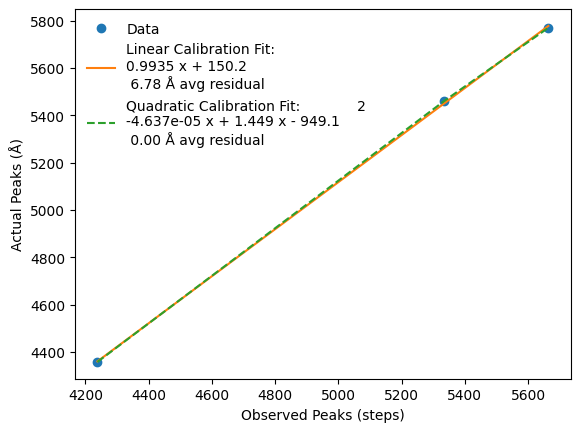

In [7]:
# derive functional calibration form
actual_peaks = [4358.328, 5460.735, 5769.60]

print(len(observed_peaks), len(actual_peaks))
# linear fit
coeffs = np.polyfit(observed_peaks, actual_peaks, 1)
print(f"Calibration coefficients: {coeffs}")
calibration_func = np.poly1d(coeffs)
print(f"Calibration function: {calibration_func}")

# quadratic fit
coeffs_quad = np.polyfit(observed_peaks, actual_peaks, 2)
print(f"Calibration coefficients (quad): {coeffs_quad}")
calibration_func_quad = np.poly1d(coeffs_quad)

avg_residual = np.mean(np.abs(calibration_func(observed_peaks) - actual_peaks))
avg_residual_quad = np.mean(np.abs(calibration_func_quad(observed_peaks) - actual_peaks))
# plot observed vs actual peaks
plt.figure()
plt.plot(observed_peaks, actual_peaks, "o", label="Data")
plt.plot(observed_peaks, calibration_func(observed_peaks), "-", label= f"Linear Calibration Fit: {calibration_func} \n {avg_residual:.2f} Å avg residual")
plt.plot(observed_peaks, calibration_func_quad(observed_peaks), "--", label= f"Quadratic Calibration Fit: {calibration_func_quad} \n {avg_residual_quad:.2f} Å avg residual")

# add text annotation of the calibration function
# plt.text(0.05, 0.95, f"Calibration: {calibration_func}" + " Å", transform=plt.gca().transAxes,
#          fontsize=10, verticalalignment='top')
plt.legend(frameon=False)

print(actual_peaks)
print(calibration_func(observed_peaks))
plt.xlabel("Observed Peaks (steps)")
plt.ylabel("Actual Peaks (Å)")

In [ ]:
# get chi^2 of the fit
residuals = np.array(actual_peaks) - calibration_func(np.array(observed_peaks))
print(residuals)
# sigma = step size
sigma = 1.0
chi2 = np.sum((residuals)**2 / sigma**2)
print(f"Chi^2 of the fit: {chi2}")
red_chi2 = chi2 / (len(actual_peaks) - 2)  # reduced chi^2
print(f"Reduced Chi^2 of the fit: {red_chi2}")

[-2.31349947 10.03454023 -7.72104077]
Chi^2 of the fit: 165.65874800701891
Reduced Chi^2 of the fit: 165.65874800701891


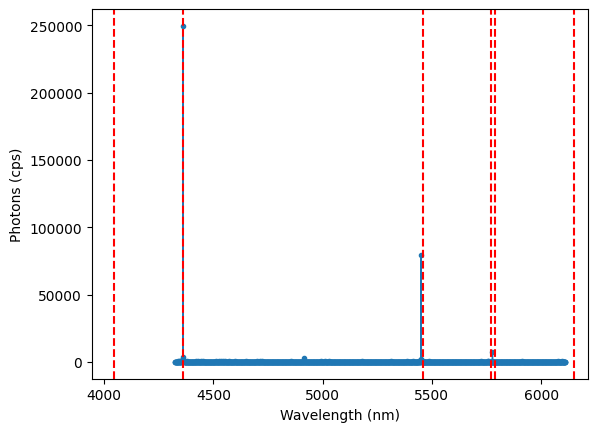

In [ ]:
# apply calibration to all steps
calibrated_wavelengths = calibration_func(step)
# plot calibrated spectrum
plt.plot(calibrated_wavelengths, cps, marker=".", lw=1, label="Calibrated Spectrum")
#

plt.xlabel("Wavelength (nm)")
plt.ylabel("Photons (cps)")

# mark known lines
for line in lines:
    plt.axvline(line, color="red", ls="--", label = f"{line} nm")